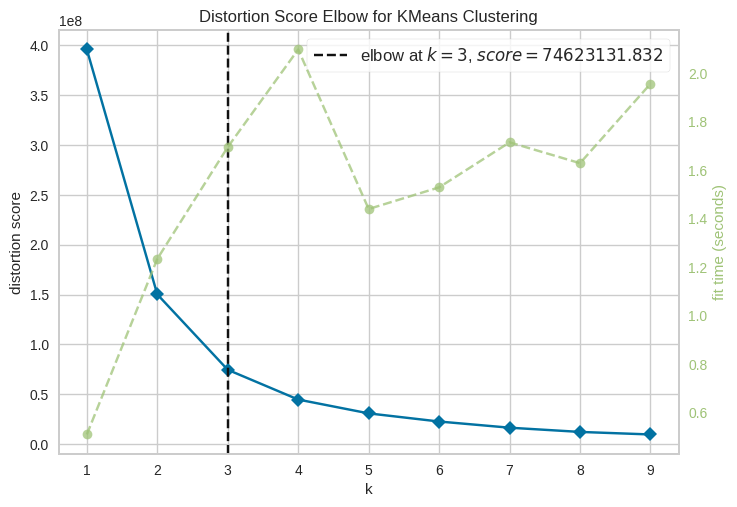

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from sklearn.cluster import KMeans # KMeans algorithm for clustering
from yellowbrick.cluster import KElbowVisualizer # KElbowVisualizer class from yellowbrick for visualizing the elbow method in clustering
import pandas as pd  # pandas for data manipulationz
import warnings

# Read the CSV file from the file path
df = pd.read_csv('/content/sample_data/heatstroke.csv')

code_mapping = {
    'neutral': 1,
    'slightly warm': 2,
    'warm': 3,
    'hot': 4,
    'very hot': 5,
    'Typing': 1,
    'Reading': 2,
    'Radio': 3
}

# Replace text codes with numbers in the specified column
df['Thermal sensation'] = df['Thermal sensation'].map(code_mapping)
df['Personal Thermal Assessment'] = df['Personal Thermal Assessment'].map(code_mapping)
df['Task'] = df['Task'].map(code_mapping).fillna(0).astype(int)

# Choose relevant features for clustering
features = ['hrv_mean', 'hrv_entropy']

# Select features
data = df[features]

# Ignore warnings - not required
warnings.filterwarnings("ignore")

# Initialize KMeans model
kmeans = KMeans()

# Use KElbowVisualizer for the elbow method
"""
  k=(1, 10): This specifies the range of values for the number of clusters (k).
  The KElbowVisualizer will evaluate the inertia for k values from 1 to 10.
"""

# Creating a KElbowVisualizer instance with the KMeans model and a range of k values from 1 to 10
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
# Fitting the visualizer to the data, computing inertias for different k values
visualizer.fit(data)
# Displaying the visualization with the elbow method plot
visualizer.show()


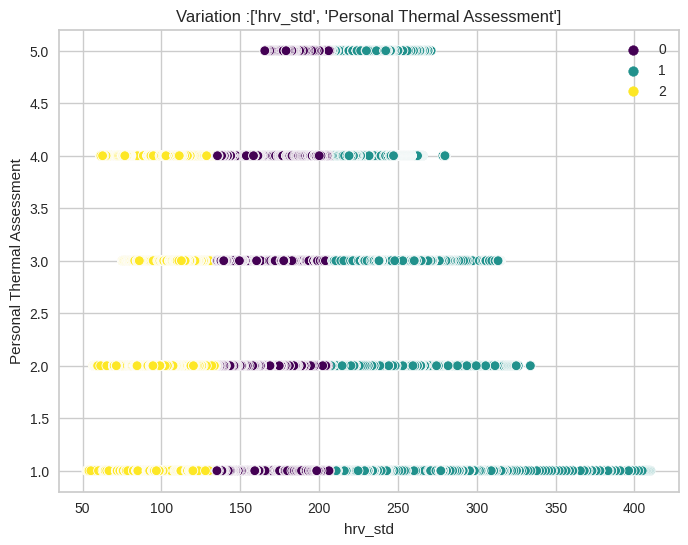

In [40]:
import seaborn as sns # seaborn for data visualization
import matplotlib.pyplot as plt # matplotlib for plotting

# Feature combination

# '''
# Uncomment the variaion you need one by one and run the program
# '''

# Variation 1
features = ['hrv_mean', 'Temperature']
# Variation 2
# features = ['hrv_std', 'Temperature']
# Variation 3
# features = ['hrv_entropy', 'Thermal sensation']
# Variation 4
# features = ['hrv_std','Personal Thermal Assessment']
# Variation 5
# features = ['Task', 'Personal Thermal Assessment']

# Create subplots for scatter plot
plt.figure(figsize=(8, 6))

# Select features
xx = df[features]

# Fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(xx)

# Plot the scatter plot
# palette='viridis' specifies the 'viridis' color palette.
sns.scatterplot(data=xx, x=features[0], y=features[1], hue=kmeans.labels_, palette='viridis')

# Concatinate features to below string
plt.title(f'Variation :{features}' )
plt.show()